In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [145]:
df = pd.read_csv('../data/MSFT_data.csv')
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2023-01-03,234.80894470214844,240.85607195731004,232.6723500003931,238.23924481140818,25740000
3,2023-01-04,224.5376739501953,228.23258683276063,221.46020498304858,227.65433977112923,50623400
4,2023-01-05,217.8828887939453,223.01854417015397,217.34383857093007,222.67550813143782,39585600


In [146]:
df.rename(columns={'Price': 'Date'}, inplace=True)
# df = df.iloc[2:]
df = df[~df['Date'].isin(['Ticker', 'Date'])]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,234.80894470214844,240.85607195731004,232.6723500003931,238.23924481140818,25740000
2023-01-04,224.5376739501953,228.23258683276063,221.46020498304858,227.65433977112923,50623400
2023-01-05,217.8828887939453,223.01854417015397,217.34383857093007,222.67550813143782,39585600
2023-01-06,220.45066833496094,221.26414125690687,214.98180331379334,218.55911012079767,43613600
2023-01-09,222.59707641601562,226.63503997806498,221.9012238905733,221.9404207414047,27369800


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2023-01-03 to 2025-05-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   604 non-null    object
 1   High    604 non-null    object
 2   Low     604 non-null    object
 3   Open    604 non-null    object
 4   Volume  604 non-null    object
dtypes: object(5)
memory usage: 28.3+ KB


In [148]:
cols = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [149]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

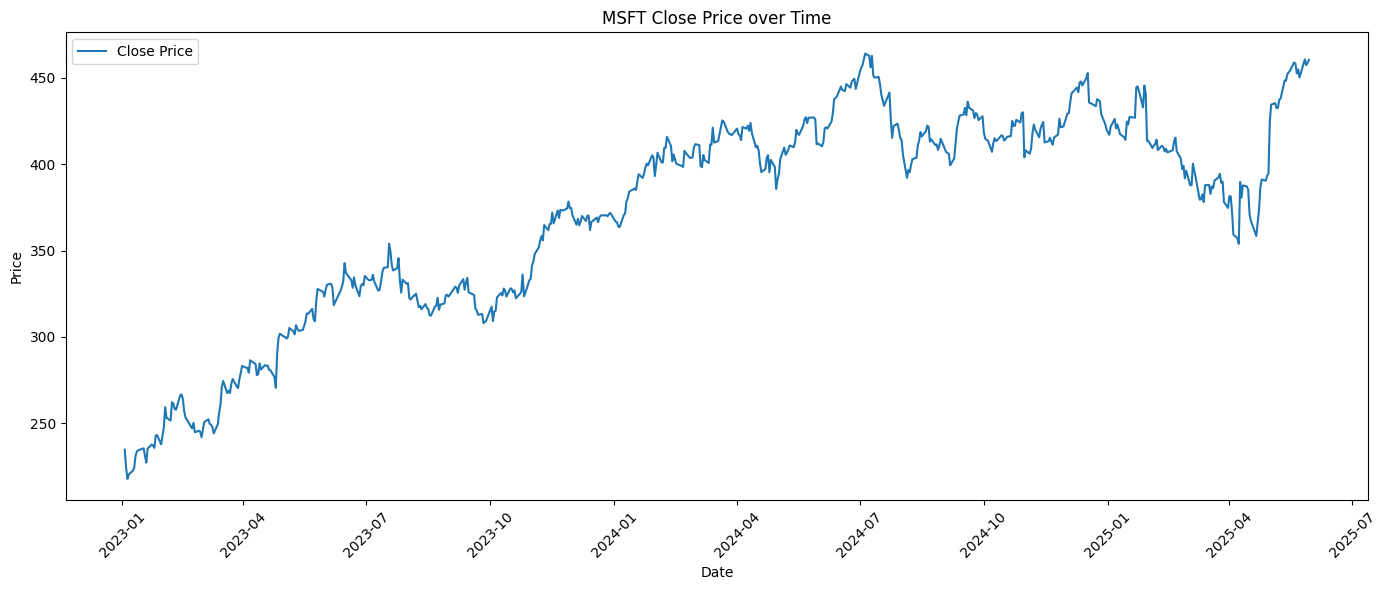

In [150]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('MSFT Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Tính đường trung bình động MA (Moving Average)**

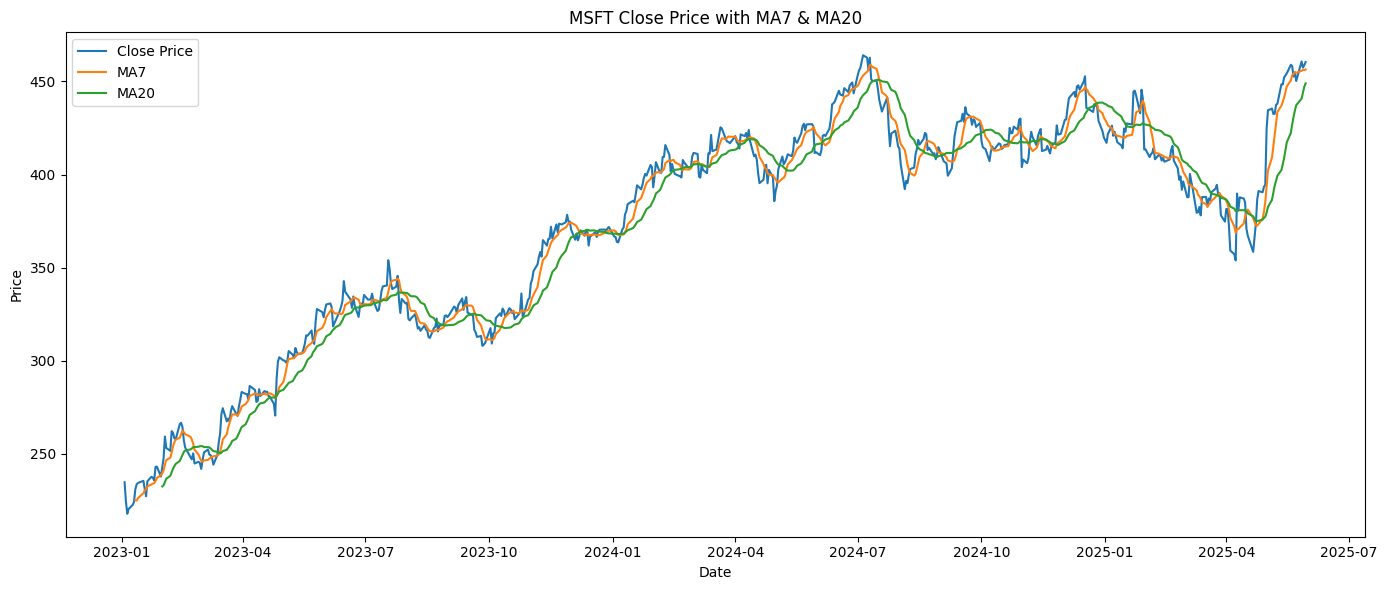

In [151]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA7'], label='MA7')
plt.plot(df['MA20'], label='MA20')
plt.title('MSFT Close Price with MA7 & MA20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

**Nhận xét**  
Xu hướng chung vẫn là tăng dài hạn  
– Từ đầu 2023 đến giữa 2025, giá cổ phiếu MSFT có xu hướng leo dốc đều, chỉ thi thoảng có những nhịp điều chỉnh ngắn hạn.  
– MA20 cũng dần dịch chuyển lên trên theo thời gian, khẳng định xu hướng tăng dài hạn.  

MA7 bắt nhịp biến động ngắn hạn nhanh hơn MA20  
– MA7 “bám sát” đường giá hơn, dao động nhiều và nhanh hơn so với MA20.  
– MA20 mượt mà hơn, chỉ phản ánh xu hướng chung, chịu trễ so với MA7 mỗi khi giá đảo chiều.  

Giao cắt MA7 – MA20 (tín hiệu đảo chiều)  
– Khi MA7 cắt lên trên MA20 (“golden cross”), thường báo hiệu một đợt tăng mới sắp bắt đầu (ví dụ giữa tháng 3/2023, cuối 2023, đầu 2025…).  
– Khi MA7 cắt xuống dưới MA20 (“dead cross”), thường xuất hiện các nhịp điều chỉnh (ví dụ giữa 2024, đầu 2025…).  

Các nhịp điều chỉnh ngắn hạn rõ nét  
– Trong các đợt giảm (như giữa 2024, đầu 2025), giá có lúc xuống thấp hơn cả MA20, nhưng thường bật lên mạnh khi MA7 quay trở lại cắt lên MA20.  
– Điều này cho thấy MA20 có thể đóng vai trò hỗ trợ động, và MA7 cho tín hiệu thoát hoặc tham gia lại thị trường nhanh hơn.  

**Phân tích độ biến động**

<Axes: >

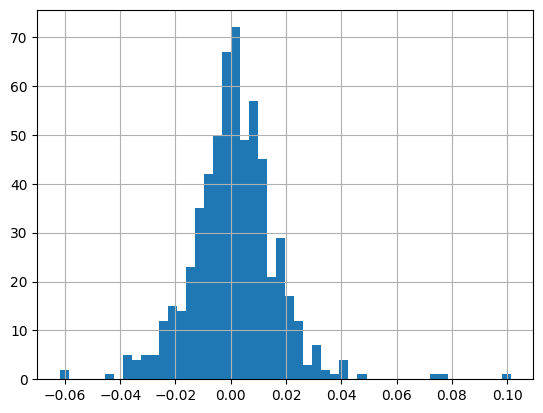

In [152]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['daily_return'] = df['Close'].pct_change()
df['daily_return'].hist(bins=50)

In [153]:
std_return = df['daily_return'].std()
print("Độ lệch chuẩn của daily_return:", std_return)

Độ lệch chuẩn của daily_return: 0.015436732147220026


**Phân tích Volume**

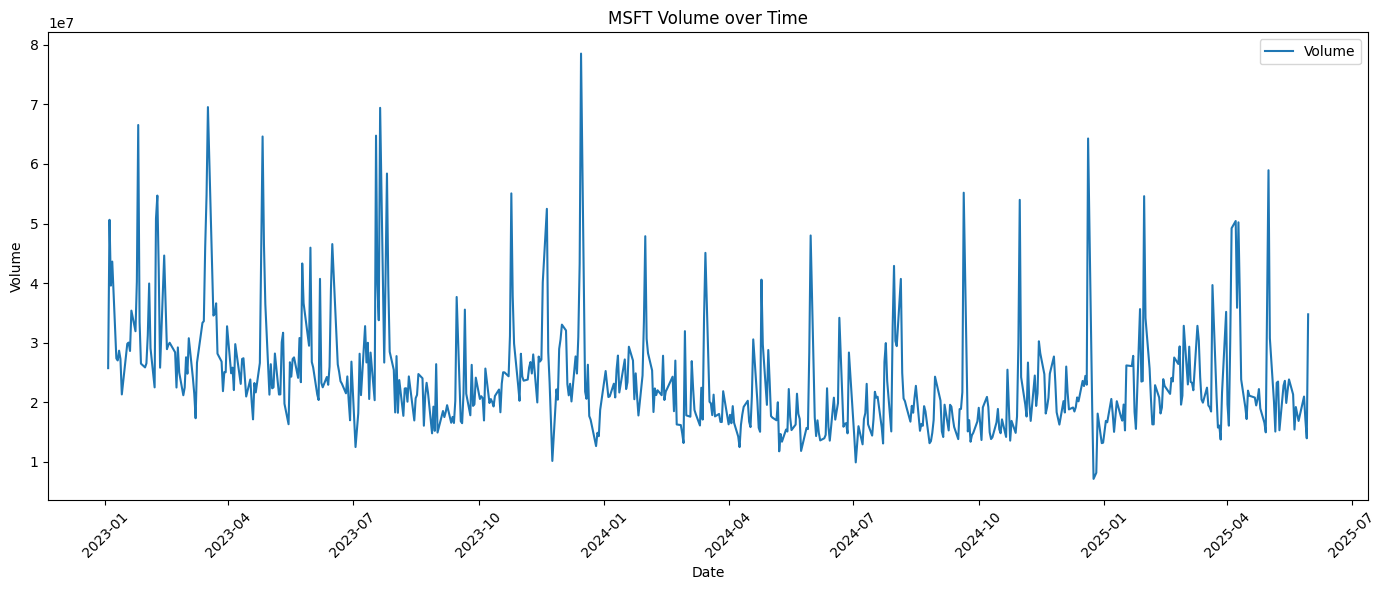

In [157]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Volume'], label='Volume')
plt.title('MSFT Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


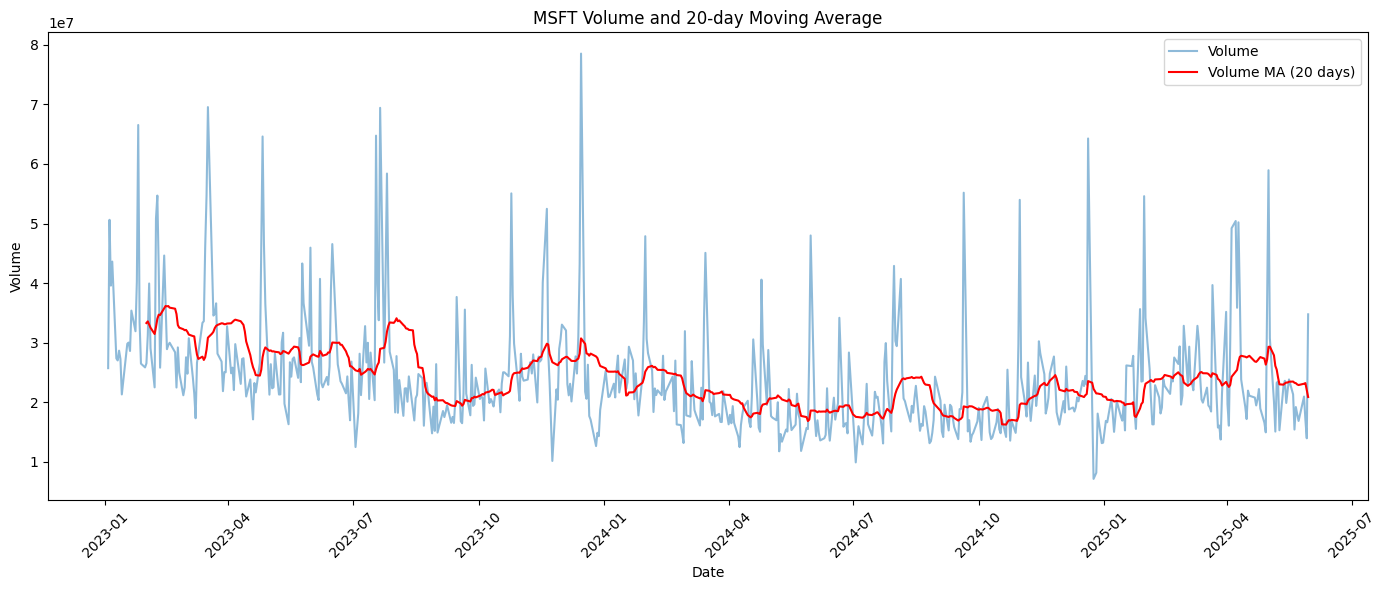

In [155]:
# Tính MA của Volume (Volume_MA)
df['Volume_MA'] = df['Volume'].rolling(window=20).mean()

# Vẽ Volume và Volume_MA
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Volume'], label='Volume', alpha=0.5)
plt.plot(df.index, df['Volume_MA'], label='Volume MA (20 days)', color='red')
plt.title('MSFT Volume and 20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dựa vào biểu đồ thấy được khối lượng giao dịch có nhiều đỉnh nhọn bất thường, nhưng có xu hướng giảm dần. Điều này có thể do thị trường đang ổn định dần hoặc sự quan tâm tới cổ phiếu MSFT đang giảm.

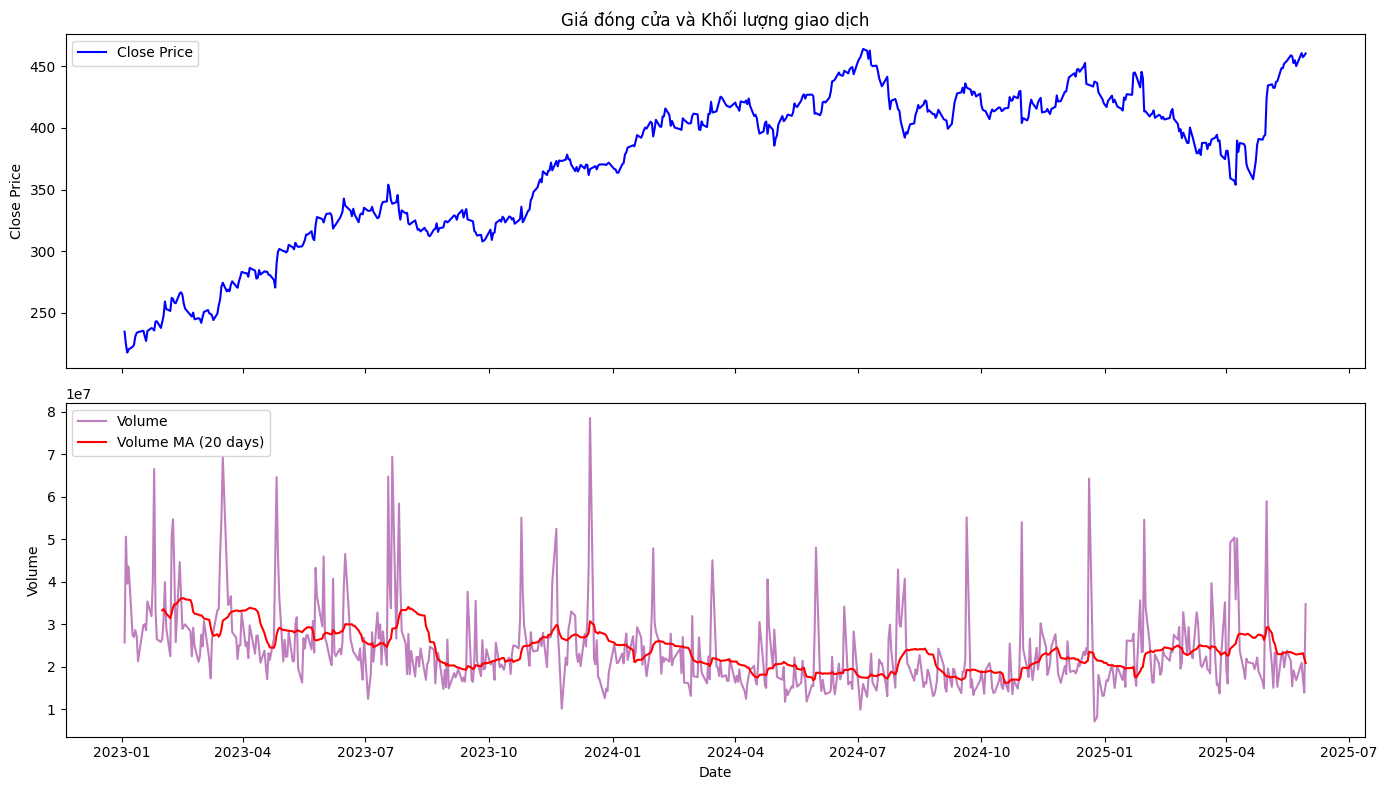

In [158]:
fig, ax = plt.subplots(2, 1, figsize=(14,8), sharex=True)

# Biểu đồ giá đóng cửa
ax[0].plot(df.index, df['Close'], label='Close Price', color='blue')
ax[0].set_ylabel('Close Price')
ax[0].legend(loc='upper left')
ax[0].set_title('Giá đóng cửa và Khối lượng giao dịch')

# Biểu đồ volume (và MA nếu muốn)
ax[1].plot(df.index, df['Volume'], label='Volume', color='purple', alpha=0.5)
ax[1].plot(df.index, df['Volume_MA'], label='Volume MA (20 days)', color='red')
ax[1].set_ylabel('Volume')
ax[1].legend(loc='upper left')
ax[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

**RSI - Relative Strength Index**

In [160]:
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain, index=series.index).rolling(window=window).mean()
    avg_loss = pd.Series(loss, index=series.index).rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI14'] = compute_rsi(df['Close'], window=14)

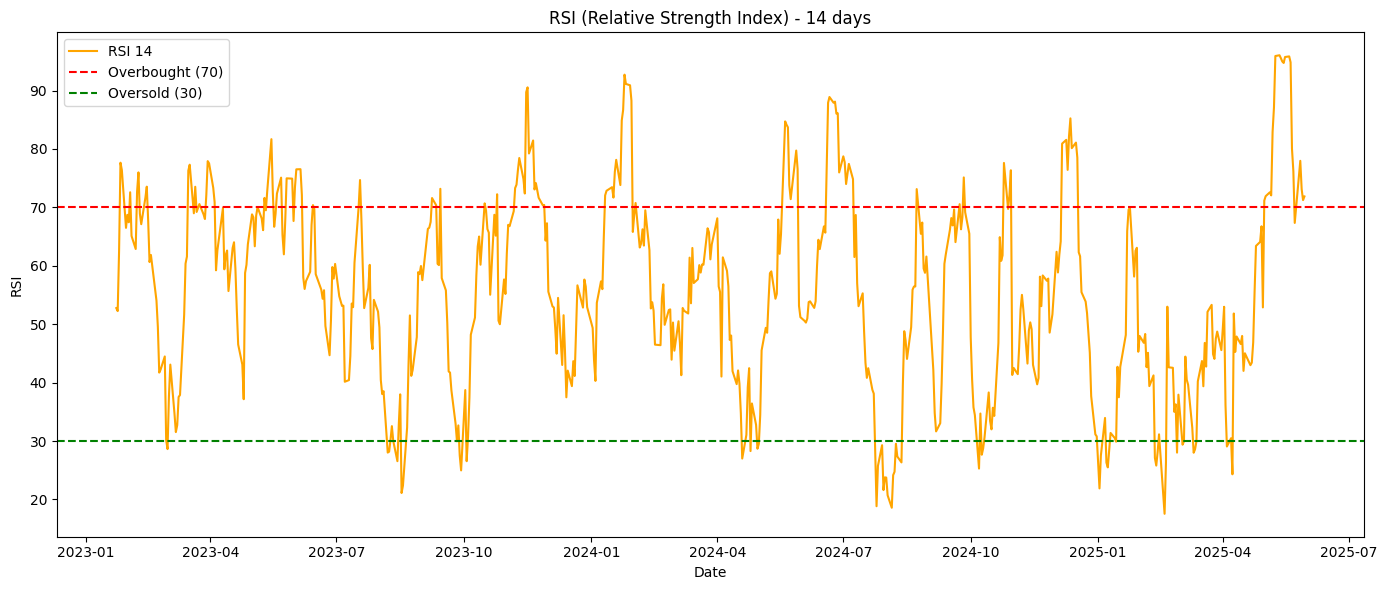

In [165]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['RSI14'], label='RSI 14', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI (Relative Strength Index) - 14 days')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

**MACD - Moving Average Convergence Divergence**

In [161]:
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

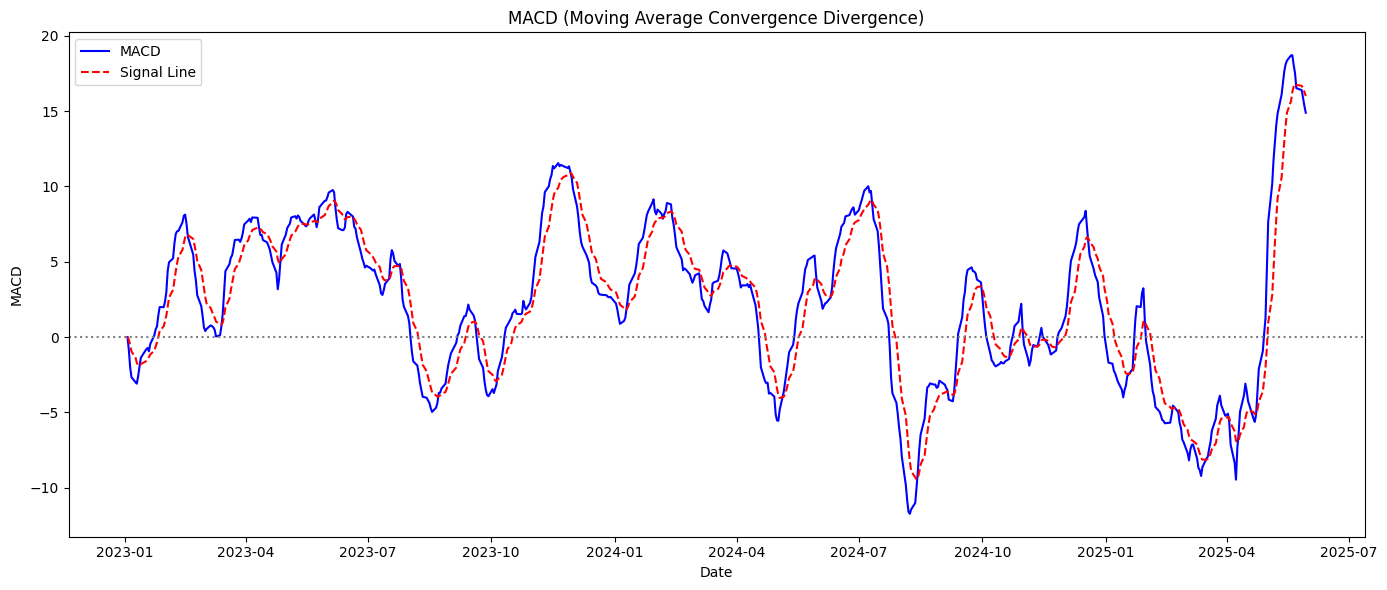

In [167]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['MACD_signal'], label='Signal Line', color='red', linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()

**Bollinger Bands**

In [162]:
window = 20
df['BB_MA20'] = df['Close'].rolling(window=window).mean()
df['BB_std'] = df['Close'].rolling(window=window).std()
df['BB_upper'] = df['BB_MA20'] + 2 * df['BB_std']
df['BB_lower'] = df['BB_MA20'] - 2 * df['BB_std']

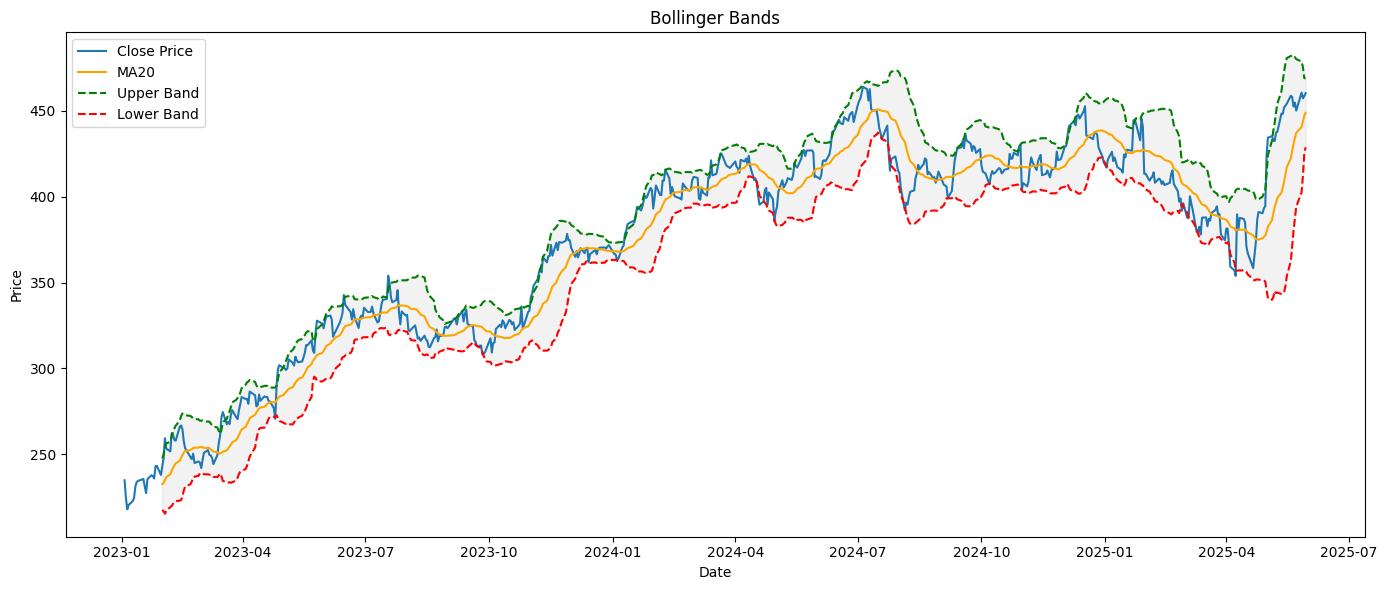

In [163]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['BB_MA20'], label='MA20', color='orange')
plt.plot(df.index, df['BB_upper'], label='Upper Band', color='green', linestyle='--')
plt.plot(df.index, df['BB_lower'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(df.index, df['BB_upper'], df['BB_lower'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

**Preprocessing**

In [169]:
df.tail(5)

,Close,High,Low,Open,Volume,MA7,MA20,daily_return,Volume_MA,RSI14,MACD,MACD_signal,BB_MA20,BB_std,BB_upper,BB_lower
Date,,,,,,,,,,,,,,,,
2025-05-23,450.179993,453.690002,448.910004,449.980011,16883500,454.578570,437.202454,-0.010289,22907550.0,67.333647,16.517979,16.743107,437.202454,21.506849,480.216152,394.188755
2025-05-27,460.690002,460.950012,456.119995,456.480011,20974300,455.658569,440.714793,0.023346,23127295.0,77.965140,16.389803,16.672446,440.714793,19.066164,478.847122,402.582465
2025-05-28,457.359985,462.519989,456.929993,461.220001,17086300,456.099997,443.916896,-0.007228,23232910.0,73.110720,15.836959,16.505349,443.916896,15.782043,475.480981,412.352811
2025-05-29,458.679993,461.720001,455.309998,461.549988,13974800,456.072854,447.124110,0.002886,22108595.0,71.239682,15.328641,16.270007,447.124110,11.016990,469.158089,425.090131
2025-05-30,460.359985,461.679993,455.540009,459.720001,34770500,456.385707,448.911087,0.003663,20900215.0,71.868230,14.889717,15.993949,448.911087,10.028945,468.968978,428.853196


In [170]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA7', 'MA20', 'daily_return',
       'Volume_MA', 'RSI14', 'MACD', 'MACD_signal', 'BB_MA20', 'BB_std',
       'BB_upper', 'BB_lower'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2023-01-03 to 2025-05-30
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         604 non-null    float64
 1   High          604 non-null    float64
 2   Low           604 non-null    float64
 3   Open          604 non-null    float64
 4   Volume        604 non-null    int64  
 5   MA7           598 non-null    float64
 6   MA20          585 non-null    float64
 7   daily_return  603 non-null    float64
 8   Volume_MA     585 non-null    float64
 9   RSI14         591 non-null    float64
 10  MACD          604 non-null    float64
 11  MACD_signal   604 non-null    float64
 12  BB_MA20       585 non-null    float64
 13  BB_std        585 non-null    float64
 14  BB_upper      585 non-null    float64
 15  BB_lower      585 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 80.2 KB


In [172]:
df = df.dropna()

In [173]:
feature_cols = ['Close','High','Low','Open','Volume',
                'MA7','MA20','daily_return','Volume_MA',
                'RSI14','MACD','MACD_signal',
                'BB_MA20','BB_std','BB_upper','BB_lower']

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[feature_cols])
df_scaled = pd.DataFrame(scaled, columns=feature_cols, index=df.index)

df_scaled.head()

,Close,High,Low,Open,Volume,MA7,MA20,daily_return,Volume_MA,RSI14,MACD,MACD_signal,BB_MA20,BB_std,BB_upper,BB_lower
Date,,,,,,,,,,,,,,,,
2023-01-31,0.004075,0.000000,0.000000,0.000000,0.271618,0.000000,0.000000,0.507655,0.856398,0.652008,0.462834,0.399848,0.000000,0.168751,0.000000,0.010140
2023-02-01,0.025881,0.031951,0.011085,0.019833,0.337765,0.006498,0.002955,0.501046,0.870273,0.635793,0.484182,0.414788,0.002955,0.192916,0.008910,0.006528
2023-02-02,0.078189,0.073979,0.062901,0.066997,0.459446,0.020912,0.010919,0.666234,0.843419,0.701191,0.530221,0.437414,0.010919,0.246161,0.029896,0.000000
2023-02-03,0.050600,0.071813,0.062241,0.070135,0.307170,0.032247,0.019004,0.234075,0.817003,0.605919,0.548588,0.459774,0.019004,0.244389,0.036963,0.008430
2023-02-06,0.043626,0.045740,0.052036,0.060982,0.215223,0.037851,0.026148,0.341371,0.763973,0.577556,0.557062,0.479627,0.026148,0.236245,0.041529,0.017652


In [179]:
def create_sequences(data, seq_len=60, pred_len=5, target_idx=0):
    """
    Arguments:
      data      -- numpy array hình dạng (n_samples, n_features)
      seq_len   -- số bước quá khứ cho X
      pred_len  -- số bước tương lai để dự đoán y
      target_idx-- chỉ số cột target trong data (mặc định 0 là Close)
    Returns:
      X -- numpy array shape (n_sequences, seq_len, n_features)
      y -- numpy array shape (n_sequences, pred_len)
    """
    X, y = [], []
    total_len = len(data)
    for i in range(total_len - seq_len - pred_len + 1):
        X.append(data[i : i + seq_len])
        y.append(data[i + seq_len : i + seq_len + pred_len, target_idx])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled.values, seq_len=60, pred_len=5, target_idx=0)

In [182]:
np.save('../data/X.npy', X)
np.save('../data/y.npy', y)